<img src="../imgs/ML.jpg" style="width:1000px;">

# <center> 05. Machine learning: an introduction! </center>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.metrics import *

%matplotlib inline

# Classification

   - The classification is the problem of predicting a discrete class label output for an example.
   - The regression is the problem of predicting a continuous quantity output for an example
    
**Function Approximation:** The idea is  developing a model using historical data to make a prediction on new data where we do not have the answer. This is done by approximating a function:    

$$\hat{f}: x(t) \to y(t)$$

$x(t) = \left \{ x_1, x_2, \ldots x_n  \right \}$ is input data, while $y(t) = \left \{0,1 \right \}$ is output data. For classification, $y(t)$ are discrete output variables. For instance, an e-mail can classified as "spam" and "nor-spam"


<img src="../imgs/PipelineImage.jpg" style="width:1000px;">


### Some examples...

1. Text categorization (spam filtering)
2. fraud detection
3. Optical character recognition
4. machine vision (face and action recognition)
5. natural-language processing (spoken languaje recognition)
6. market segmentation (predict if customer will respond to a promotion)
7. bioinformatics (classify proteins according their function)


### Go to real-life!

see dataset description at: http://archive.ics.uci.edu/ml/datasets/banknote+authentication

load a dataset

Attribute Information:

1. variance of Wavelet Transformed image (continuous) 
2. skewness of Wavelet Transformed image (continuous) 
3. curtosis of Wavelet Transformed image (continuous) 
4. entropy of image (continuous) 
5. class (integer) 

## <span style="color:red">Go to presentation: Intro_ML.pdf .. !! </span>


In [2]:
d = pd.read_csv("../data/data_banknote_authentication.txt.gz")
print d.shape
d.head()

(1372, 5)


,varwt,skewt,curwt,entrwt,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


first inspection of data and binary relationships.

- are variables normal?
- what relations do you see?

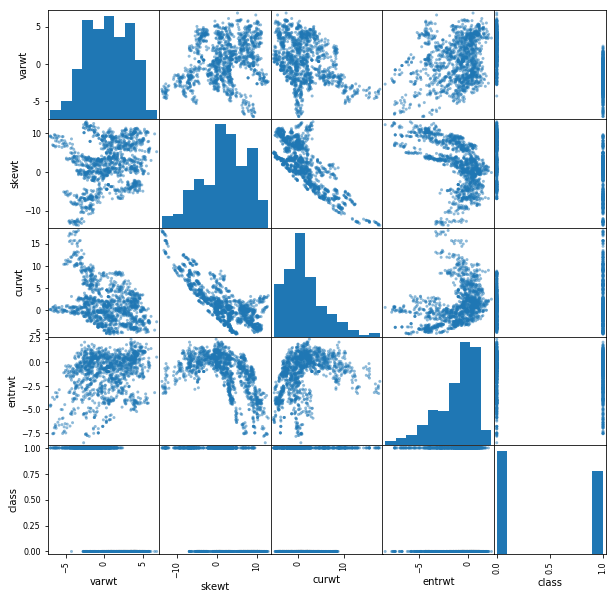

In [3]:
pd.plotting.scatter_matrix(d, figsize=(10,10));

now split data: input columns and colum to be predicted

In [4]:
X = d.values[:,:-1]
y = d.values[:,-1]


now create an estimator, train and predict

### Gaussian Naive Bayes, simple Bayes or independence Bayes.

It is a simple probabilistic classifiers based on applying Bayes' theorem with strong (naive) independence assumptions between the features.

- An advantage of naive Bayes is that it only requires a small number of training data to estimate the parameters necessary for classification
 
-  A naive Bayes classifier considers each of these features to contribute independently to the probability that this fruit is an apple, regardless of any possible correlations between the color, roundness, and diameter features.

- It is not necessary the computation of covariance matrix 


## <span style="color:red">Thecnical information in complement notes .. !! </span>

In [5]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
est = GaussianNB()

est.fit(X,y)
predictions = est.predict(X)
print "first 100 predictions", predictions[:100]
print "first 100 targets    ", y[:100]


first 100 predictions [ 0.  0.  0.  0.  1.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  1.  0.  0.  1.  0.  0.  0.  1.  1.  0.  0.  0.  1.  0.  0.  0.  1.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.
  0.  0.  0.  1.  0.  1.  0.  1.  0.  1.]
first 100 targets     [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]


accuracy of predicions

In [6]:
print "%.3f"%accuracy_score(predictions, y)

0.841


but wait! we are cheating!! cannot use same data for training and for test. let's use the first half for training and the rest for test

In [7]:
n = len(X)/2
est.fit(X[:n], y[:n])
print "%.3f"%accuracy_score(est.predict(X[n:]), y[n:])

0.111


what happened?!?!?

In [8]:
print "first 100", y[:100]
print "last  100", y[-100:]
print "class distribution", [(i, sum(y==i)) for i in np.unique(y)]

first 100 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
last  100 [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]
class distribution [(0.0, 762), (1.0, 610)]


data is not shuffled, we are training only with one class. understand next chart and how it is built

Text(0.5,0,u'n')

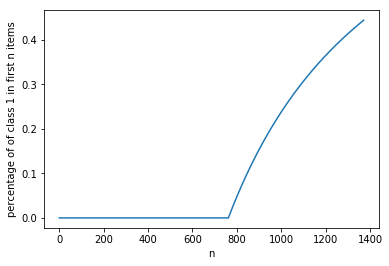

In [9]:
t = range(1,len(y))
p = [np.mean(y[:i]) for i in t]
plt.plot(t,p)
plt.ylabel("percentage of of class 1 in first n items")
plt.xlabel("n")

let's use cross validation and build more confidence in our results

<img src="../imgs/kfold.jpg" style="width:400px;">

In [10]:
s = cross_val_score(est, X, y, cv=KFold(10, shuffle=True), scoring=make_scorer(accuracy_score))
print s
print "accuracy %.3f (+/- %.5f)"%(np.mean(s), np.std(s))

[ 0.86231884  0.77536232  0.84671533  0.81021898  0.87591241  0.86131387
  0.82481752  0.81751825  0.8540146   0.86131387]
accuracy 0.839 (+/- 0.02954)


let's understand better how this estimator is performing.

- TPR: true positive rate (sensitivity), e.g.,  the percentage of sick people who are correctly identified as having the condition
- TNR: true negative rate (specificity), e.g., the percentage of healthy people who are correctly identified as not having the condition

From Wiki: 

- True positive: Sick people correctly identified as sick
- False positive: Healthy people incorrectly identified as sick
- True negative: Healthy people correctly identified as healthy
- False negative: Sick people incorrectly identified as healthy

In general

- True positive = correctly identified
- False positive = incorrectly identified
- True negative = correctly rejected
- False negative = incorrectly rejected

In [11]:
def tpr(est,X,y):
    p = est.predict(X)
    return np.mean (p[y==1] == y[y==1])

def tnr(est,X,y):
    p = est.predict(X)
    return np.mean(p[y==0] == y[y==0])

In [12]:
s = cross_val_score(est, X, y, cv=KFold(10, shuffle=True), scoring=tpr)
print "tpr %.3f (+/- %.5f)"%(np.mean(s), np.std(s))
s = cross_val_score(est, X, y, cv=KFold(10, shuffle=True), scoring=tnr)
print "tnr %.3f (+/- %.5f)"%(np.mean(s), np.std(s))

tpr 0.791 (+/- 0.04343)
tnr 0.878 (+/- 0.04018)


### Decision Tree classifier

The idea is to create a model that predicts the value of a target variable based on several input variables. The observations about an item is represented in the branches and the conclusions about the item's target value represented in the leaves


- Tree models where the target variable can take a discrete set of values are called **classification trees**
- Decision trees where the target variable can take continuous values (typically real numbers) are called **regression trees**


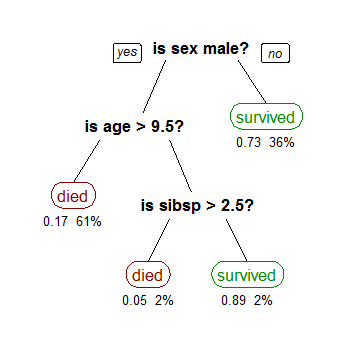

In [13]:
from IPython.display import Image
Image(filename='../imgs/CART_tree_titanic_survivors.png')

we now use other estimators. Observe the all follow sklearn API

In [14]:
from sklearn.tree import DecisionTreeClassifier
est = DecisionTreeClassifier()
s = cross_val_score(est, X, y, cv=KFold(10, shuffle=True), scoring=make_scorer(accuracy_score))
print "accuracy %.3f (+/- %.5f)"%(np.mean(s), np.std(s))
s = cross_val_score(est, X, y, cv=KFold(10, shuffle=True), scoring=tpr)
print "tpr      %.3f (+/- %.5f)"%(np.mean(s), np.std(s))
s = cross_val_score(est, X, y, cv=KFold(10, shuffle=True), scoring=tnr)
print "tnr      %.3f (+/- %.5f)"%(np.mean(s), np.std(s))

accuracy 0.988 (+/- 0.00733)
tpr      0.985 (+/- 0.01223)
tnr      0.982 (+/- 0.01398)


** Many times is useful to know what features are more important to classify! **

In [15]:
est.fit(X,y)
est.feature_importances_

array([ 0.58218971,  0.23907275,  0.15461606,  0.02412147])

## <span style="color:orange">student</span>: 
Perform a classification using the most detected important features. Which classifier is best?

### Random Forest classifier (RFC)

Many times the tree is dependent of features initialization and the output can be sensible. To overcome some of these problems, a set of trees can be built to perform the classification. Each tree give a result an agreement criteria is used to obtain the classification

In [18]:
from sklearn.ensemble import RandomForestClassifier

est = RandomForestClassifier()
s = cross_val_score(est, X, y, cv=KFold(10, shuffle=True), scoring=make_scorer(accuracy_score))
print "accuracy %.3f (+/- %.5f)"%(np.mean(s), np.std(s))
s = cross_val_score(est, X, y, cv=KFold(10, shuffle=True), scoring=tpr)
print "tpr      %.3f (+/- %.5f)"%(np.mean(s), np.std(s))
s = cross_val_score(est, X, y, cv=KFold(10, shuffle=True), scoring=tnr)
print "tnr      %.3f (+/- %.5f)"%(np.mean(s), np.std(s))

accuracy 0.937 (+/- 0.01921)
tpr      0.933 (+/- 0.03936)
tnr      0.944 (+/- 0.01716)


### Support vector machine (SVM)

Is one of the most know machine learning thecnique. It is based on learn a model to separate two classes, which are represented as vectors. 

- The examples are used to find best vectors **(support vectors)** that better split the learning space. This support vectors are closer to the hiperplane. 

- The **main** goal is to **maximize** the classifier margin, described between the **support vectors**

- Example: 
    - H1 **No** separa las clases
    - H2 perform a separation with little margin
    - H3 bult boundaries that separate both classes with maximum margin
- **Marginn**: maximum distance between the hiperplane and data

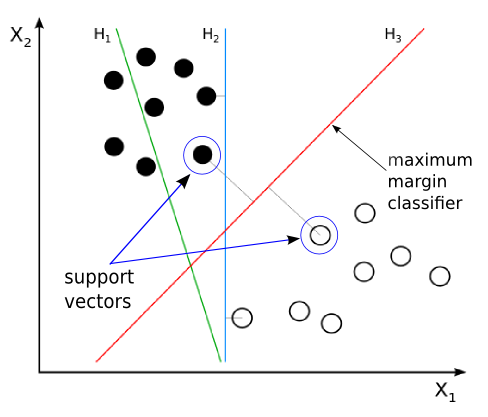

In [16]:
from IPython.display import Image
Image(filename='../imgs/svm_diagram.png', width=400)

In [17]:
X = d.values[:,:-1]
y = d.values[:,-1]

X = d.values[:,:-3]
y = d.values[:,-1]


from sklearn.svm import SVC
est = SVC()
s = cross_val_score(est, X, y, cv=KFold(10, shuffle=True), scoring=make_scorer(accuracy_score))
print "accuracy %.3f (+/- %.5f)"%(np.mean(s), np.std(s))
s = cross_val_score(est, X, y, cv=KFold(10, shuffle=True), scoring=tpr)
print "tpr      %.3f (+/- %.5f)"%(np.mean(s), np.std(s))
s = cross_val_score(est, X, y, cv=KFold(10, shuffle=True), scoring=tnr)
print "tnr      %.3f (+/- %.5f)"%(np.mean(s), np.std(s))

accuracy 0.934 (+/- 0.01284)
tpr      0.964 (+/- 0.02882)
tnr      0.911 (+/- 0.02294)


## <span style="color:orange">student</span>: 

Go to complement notes: **com_Notas_05** and perform a classification of titanic dataset. 


# References

[1] Tutorial on k-fold cross validation https://machinelearningmastery.com/k-fold-cross-validation/

[2] Titanic dataset. https://www.kaggle.com/c/titanic

[3] Sensitivity and specificity: https://en.wikipedia.org/wiki/Sensitivity_and_specificity

---
# <center> Thanks! </center>